# Práctica
Proyecto Integrador: Desarrollar un proyecto que combine NumPy y Pandas para
abordar un problema de IA.
En este caso se puede usar la base de datos FIFA 20 para realizar análisis sobre ella.

In [26]:
#Actividad Practica
#Desarrollar un proyecto que combine NumPy y Pandas para abordar un problema de IA. En este caso se puede usar la base de datos FIFA 20 para realizar análisis sobre ella.
#Los conjuntos de datos proporcionados incluyen los datos de los jugadores para el Modo Carrera de FIFA 15 a FIFA 20 ("players_20.csv"). Los datos permiten comparaciones múltiples de los mismos jugadores en las últimas 6 versiones del videojuego.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fifa_20 = pd.read_csv('players_20.csv')
fifa_20.head(10)


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
5,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,28,1991-06-28,181,70,Belgium,Manchester City,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,203376,https://sofifa.com/player/203376/virgil-van-di...,V. van Dijk,Virgil van Dijk,27,1991-07-08,193,92,Netherlands,Liverpool,...,79+3,83+3,83+3,83+3,79+3,81+3,87+3,87+3,87+3,81+3
8,177003,https://sofifa.com/player/177003/luka-modric/2...,L. Modrić,Luka Modrić,33,1985-09-09,172,66,Croatia,Real Madrid,...,81+3,81+3,81+3,81+3,81+3,79+3,72+3,72+3,72+3,79+3
9,209331,https://sofifa.com/player/209331/mohamed-salah...,M. Salah,Mohamed Salah Ghaly,27,1992-06-15,175,71,Egypt,Liverpool,...,70+3,67+3,67+3,67+3,70+3,66+3,57+3,57+3,57+3,66+3


In [27]:
fifa_20.shape

(18278, 104)

In [28]:
fifa_20.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

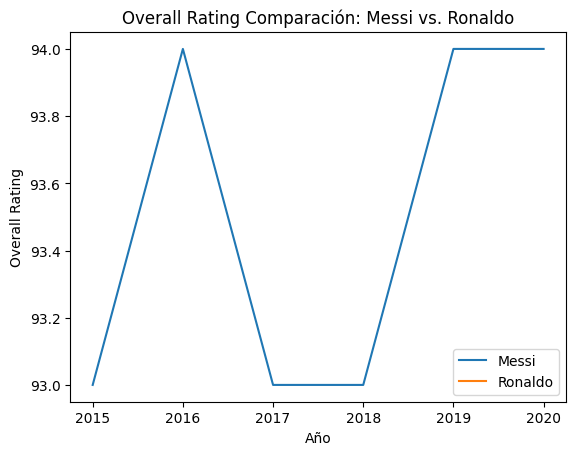

In [32]:
#Comparación histórica entre Messi y Ronaldo (qué atributos de habilidad cambiaron más durante el tiempo, en comparación con las estadísticas de la vida real);
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carga todos los archivos CSV
fifa_data = []
for year in range(15, 21):
    file_path = f'players_{year}.csv'
    df = pd.read_csv(file_path)
    df['year'] = 2000 + year  # Añade una columna para el año
    fifa_data.append(df)

# Combina todos los DataFrames en uno solo
all_fifa_data = pd.concat(fifa_data, ignore_index=True)

# Filtra los datos para Messi y Ronaldo
messi = all_fifa_data[all_fifa_data['short_name'] == 'L. Messi']
ronaldo = all_fifa_data[all_fifa_data['short_name'] == 'C. Ronaldo']

# Selecciona la habilidad a comparar
skill_to_compare = 'overall'

# Años de 2015 a 2020
years = range(2015, 2021)

messi_skill = []
ronaldo_skill = []

# Extrae los datos, manejando posibles valores faltantes
for year in years:
    messi_data = messi[messi['year'] == year][skill_to_compare].values
    ronaldo_data = ronaldo[ronaldo['year'] == year][skill_to_compare].values

    messi_skill.append(messi_data[0] if messi_data.size > 0 else None)
    ronaldo_skill.append(ronaldo_data[0] if ronaldo_data.size > 0 else None)

# Grafica los datos usando matplotlib.pyplot
plt.plot(years, messi_skill, label='Messi')
plt.plot(years, ronaldo_skill, label='Ronaldo')
plt.xlabel('Año')
plt.ylabel(skill_to_compare.capitalize() + ' Rating')
plt.title(skill_to_compare.capitalize() + ' Rating Comparación: Messi vs. Ronaldo')
plt.legend()
plt.show()

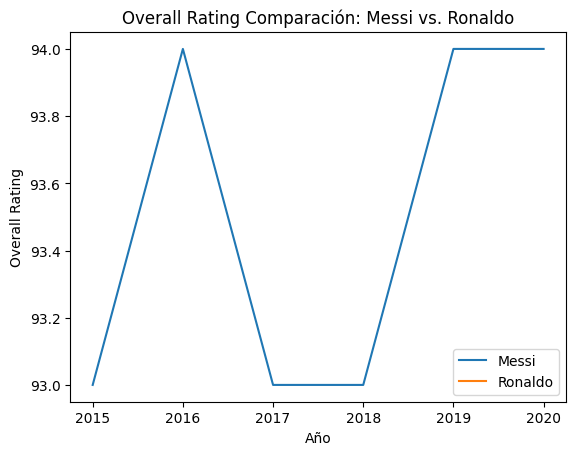

In [33]:
import pandas as pd  # Importamos la biblioteca pandas para trabajar con DataFrames
import numpy as np  # Importamos la biblioteca numpy para operaciones numéricas
import matplotlib.pyplot as plt  # Importamos la biblioteca matplotlib para graficar

# Cargamos todos los archivos CSV de jugadores de FIFA 15 a FIFA 20
fifa_data = []
for year in range(15, 21):  # Iteramos sobre los años de 2015 a 2020
    file_path = f'players_{year}.csv'  # Creamos la ruta del archivo para cada año
    df = pd.read_csv(file_path)  # Leemos el archivo CSV en un DataFrame
    df['year'] = 2000 + year  # Añadimos una columna 'year' para indicar el año de los datos
    fifa_data.append(df)  # Agregamos el DataFrame a la lista fifa_data

# Combinamos todos los DataFrames en uno solo
all_fifa_data = pd.concat(fifa_data, ignore_index=True)  # Concatenamos los DataFrames en uno solo

# Filtramos los datos para Messi y Ronaldo
messi = all_fifa_data[all_fifa_data['short_name'] == 'L. Messi']  # Filtramos los datos de Messi
ronaldo = all_fifa_data[all_fifa_data['short_name'] == 'C. Ronaldo']  # Filtramos los datos de Ronaldo

# Seleccionamos la habilidad a comparar
skill_to_compare = 'overall'  # Elegimos la habilidad 'overall' para la comparación

# Años de 2015 a 2020
years = range(2015, 2021)  # Creamos una lista de años para la comparación

messi_skill = []  # Lista para almacenar las habilidades de Messi a lo largo de los años
ronaldo_skill = []  # Lista para almacenar las habilidades de Ronaldo a lo largo de los años

# Extraemos los datos, manejando posibles valores faltantes
for year in years:  # Iteramos sobre los años
    messi_data = messi[messi['year'] == year][skill_to_compare].values  # Extraemos la habilidad de Messi para el año actual
    ronaldo_data = ronaldo[ronaldo['year'] == year][skill_to_compare].values  # Extraemos la habilidad de Ronaldo para el año actual

    # Añadimos la habilidad a la lista correspondiente, o None si no hay datos para ese año
    messi_skill.append(messi_data[0] if messi_data.size > 0 else None)
    ronaldo_skill.append(ronaldo_data[0] if ronaldo_data.size > 0 else None)

# Graficamos los datos usando matplotlib.pyplot
plt.plot(years, messi_skill, label='Messi')  # Graficamos la evolución de la habilidad de Messi
plt.plot(years, ronaldo_skill, label='Ronaldo')  # Graficamos la evolución de la habilidad de Ronaldo
plt.xlabel('Año')  # Etiqueta del eje x
plt.ylabel(skill_to_compare.capitalize() + ' Rating')  # Etiqueta del eje y
plt.title(skill_to_compare.capitalize() + ' Rating Comparación: Messi vs. Ronaldo')  # Título del gráfico
plt.legend()  # Mostramos la leyenda
plt.show()  # Mostramos el gráfico

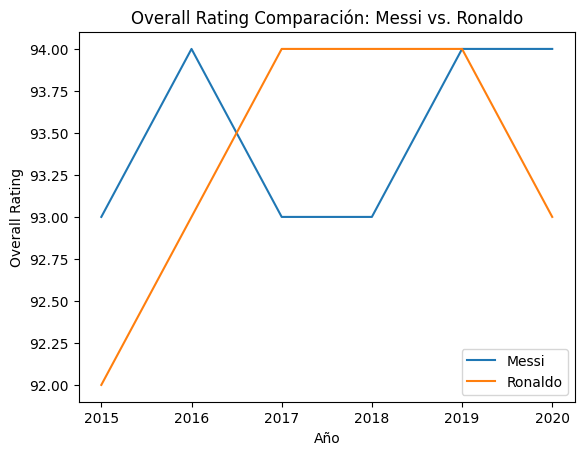

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargamos todos los archivos CSV de jugadores de FIFA 15 a FIFA 20
fifa_data = []
for year in range(15, 21):
    file_path = f'players_{year}.csv'
    df = pd.read_csv(file_path)
    df['year'] = 2000 + year
    fifa_data.append(df)

# Combinamos todos los DataFrames en uno solo
all_fifa_data = pd.concat(fifa_data, ignore_index=True)

# Filtramos los datos para Messi y Ronaldo (corrección aquí)
messi = all_fifa_data[all_fifa_data['short_name'] == 'L. Messi']
ronaldo = all_fifa_data[all_fifa_data['short_name'] == 'Cristiano Ronaldo']  # Nombre completo de Ronaldo

# Seleccionamos la habilidad a comparar
skill_to_compare = 'overall'

# Años de 2015 a 2020
years = range(2015, 2021)

messi_skill = []
ronaldo_skill = []

# Extraemos los datos, manejando posibles valores faltantes
for year in years:
    messi_data = messi[messi['year'] == year][skill_to_compare].values
    ronaldo_data = ronaldo[ronaldo['year'] == year][skill_to_compare].values

    messi_skill.append(messi_data[0] if messi_data.size > 0 else None)
    ronaldo_skill.append(ronaldo_data[0] if ronaldo_data.size > 0 else None)

# Graficamos los datos usando matplotlib.pyplot
plt.plot(years, messi_skill, label='Messi')
plt.plot(years, ronaldo_skill, label='Ronaldo')  # Ahora Ronaldo se graficará correctamente
plt.xlabel('Año')
plt.ylabel(skill_to_compare.capitalize() + ' Rating')
plt.title(skill_to_compare.capitalize() + ' Rating Comparación: Messi vs. Ronaldo')
plt.legend()
plt.show()

In [35]:
import pandas as pd

# Cargamos todos los archivos CSV de jugadores de FIFA 15 a FIFA 20
fifa_data = []
for year in range(15, 21):
    file_path = f'players_{year}.csv'
    df = pd.read_csv(file_path)
    df['year'] = 2000 + year
    fifa_data.append(df)

# Combinamos todos los DataFrames en uno solo
all_fifa_data = pd.concat(fifa_data, ignore_index=True)

# Ordenamos el DataFrame por la columna 'overall' en orden descendente
top_players = all_fifa_data.sort_values('overall', ascending=False)

# Mostramos los primeros 10 jugadores
print(top_players[['short_name', 'overall', 'year']].head(10))

              short_name  overall  year
47355  Cristiano Ronaldo       94  2018
15465           L. Messi       94  2016
30346  Cristiano Ronaldo       94  2017
64947  Cristiano Ronaldo       94  2019
64948           L. Messi       94  2019
82717           L. Messi       94  2020
0               L. Messi       93  2015
15466  Cristiano Ronaldo       93  2016
30347           L. Messi       93  2017
82718  Cristiano Ronaldo       93  2020


In [36]:
import pandas as pd

# Cargamos todos los archivos CSV de jugadores de FIFA 15 a FIFA 20
fifa_data = []
for year in range(15, 21):
    file_path = f'players_{year}.csv'
    df = pd.read_csv(file_path)
    df['year'] = 2000 + year
    fifa_data.append(df)

# Combinamos todos los DataFrames en uno solo
all_fifa_data = pd.concat(fifa_data, ignore_index=True)

# Filtramos para excluir a Messi y Ronaldo
players_sin_messi_ronaldo = all_fifa_data[~all_fifa_data['short_name'].isin(['L. Messi', 'Cristiano Ronaldo'])]

# Ordenamos el DataFrame por la columna 'overall' en orden descendente
top_players = players_sin_messi_ronaldo.sort_values('overall', ascending=False)

# Mostramos los primeros 10 jugadores (sin Messi ni Ronaldo)
print(top_players[['short_name', 'overall', 'year']].head(10))

      short_name  overall  year
47358   M. Neuer       92  2018
30348     Neymar       92  2017
82719  Neymar Jr       92  2020
64949  Neymar Jr       92  2019
47357     Neymar       92  2018
47359  L. Suárez       92  2018
30350  L. Suárez       92  2017
30349   M. Neuer       92  2017
82721  E. Hazard       91  2020
82720   J. Oblak       91  2020


In [37]:
import pandas as pd

# Cargamos todos los archivos CSV de jugadores de FIFA 15 a FIFA 20
fifa_data = []
for year in range(15, 21):
    file_path = f'players_{year}.csv'
    df = pd.read_csv(file_path)
    df['year'] = 2000 + year
    fifa_data.append(df)

# Combinamos todos los DataFrames en uno solo
all_fifa_data = pd.concat(fifa_data, ignore_index=True)

# Filtramos por porteros (posición 'GK')
porteros = all_fifa_data[all_fifa_data['player_positions'] == 'GK']

# Ordenamos por la habilidad 'gk_diving' (o cualquier otra habilidad relevante para porteros)
mejores_porteros = porteros.sort_values('gk_diving', ascending=False)

# Mostramos los primeros 10 porteros
print(mejores_porteros[['short_name', 'gk_diving', 'year']].head(10))

          short_name  gk_diving  year
64958       M. Neuer       91.0  2019
47358       M. Neuer       91.0  2018
64950         De Gea       90.0  2019
82731         De Gea       90.0  2020
65002       K. Navas       90.0  2019
82791  G. Donnarumma       90.0  2020
82770       K. Navas       90.0  2020
47361         De Gea       90.0  2018
47368      G. Buffon       89.0  2018
82749      H. Lloris       89.0  2020


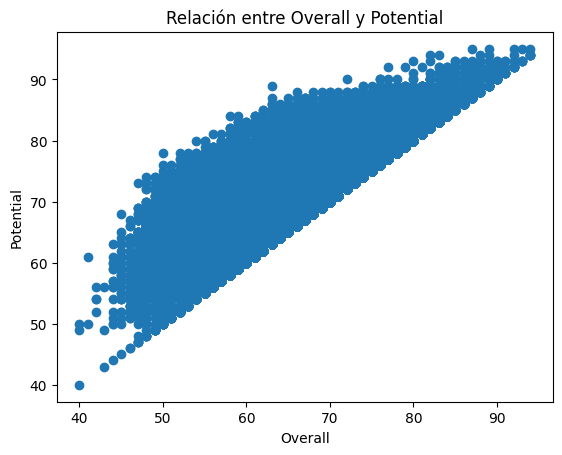

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# ... (código para cargar y concatenar los DataFrames)

plt.scatter(all_fifa_data['overall'], all_fifa_data['potential'])
plt.xlabel('Overall')
plt.ylabel('Potential')
plt.title('Relación entre Overall y Potential')
plt.show()

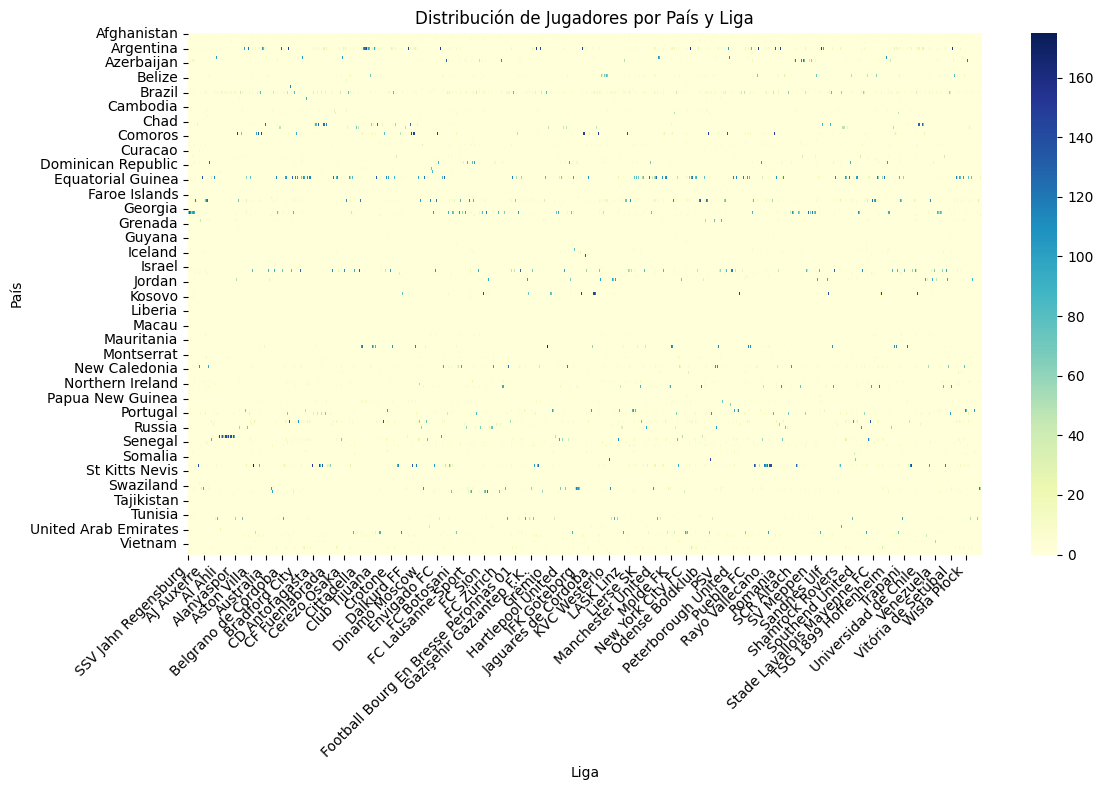

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargamos todos los archivos CSV de jugadores de FIFA 15 a FIFA 20
fifa_data = []
for year in range(15, 21):
    file_path = f'players_{year}.csv'
    df = pd.read_csv(file_path)
    df['year'] = 2000 + year
    fifa_data.append(df)

# Combinamos todos los DataFrames en uno solo
all_fifa_data = pd.concat(fifa_data, ignore_index=True)

# Creamos una tabla pivote para contar el número de jugadores por país y por liga
player_counts = all_fifa_data.pivot_table(index='nationality', columns='club', values='sofifa_id', aggfunc='count', fill_value=0)

# Creamos un mapa de calor
plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura si es necesario
sns.heatmap(player_counts, cmap='YlGnBu')
plt.xlabel('Liga')
plt.ylabel('País')
plt.title('Distribución de Jugadores por País y Liga')
plt.xticks(rotation=45, ha='right')  # Rota las etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajusta el diseño para evitar que las etiquetas se superpongan
plt.show()

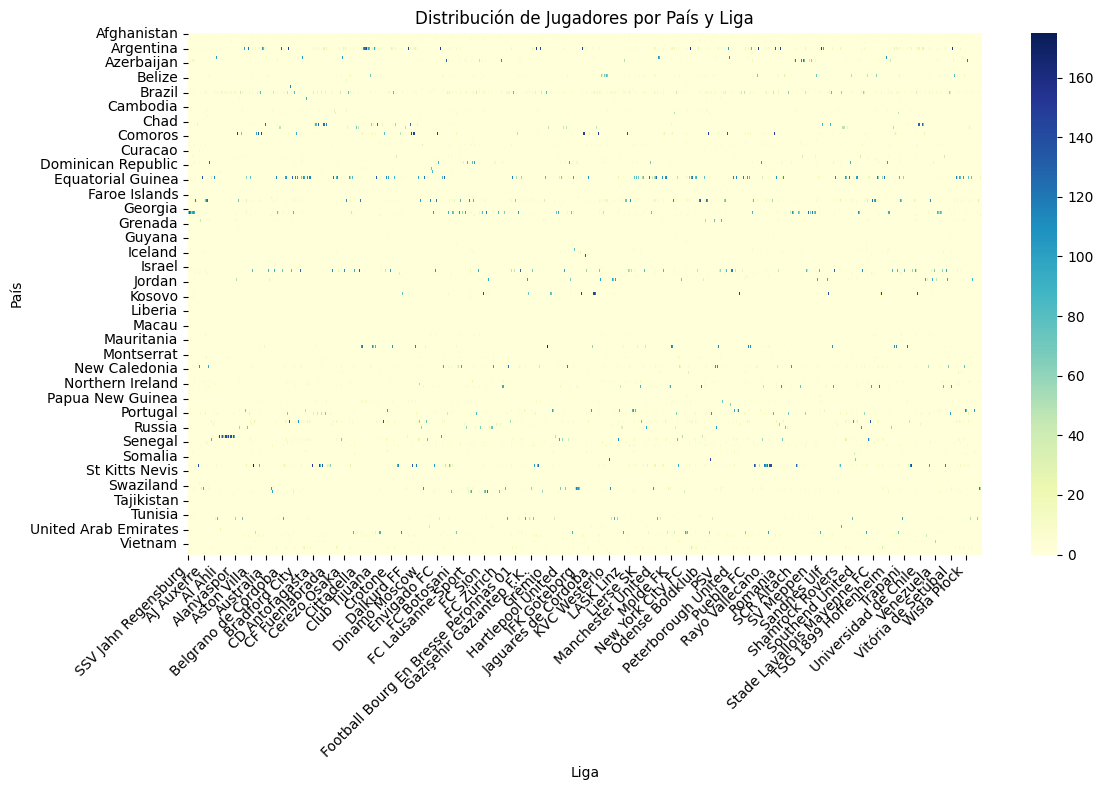

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargamos todos los archivos CSV de jugadores de FIFA 15 a FIFA 20
fifa_data = []
for year in range(15, 21):
    file_path = f'players_{year}.csv'
    df = pd.read_csv(file_path)
    df['year'] = 2000 + year
    fifa_data.append(df)

# Combinamos todos los DataFrames en uno solo
all_fifa_data = pd.concat(fifa_data, ignore_index=True)

# Creamos una tabla pivote para contar el número de jugadores por país y liga
player_counts = all_fifa_data.pivot_table(index='nationality', columns='club', values='sofifa_id', aggfunc='count', fill_value=0)

# Creamos un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(player_counts, cmap='YlGnBu')
plt.xlabel('Liga')
plt.ylabel('País')
plt.title('Distribución de Jugadores por País y Liga')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()